# Densely Connected Feed Forward Network using Keras' Sequential Model

https://keras.io/models/sequential/

In [179]:
from sklearn import datasets

from keras.layers import Dense
from keras.models import Sequential

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
fig_size = (12, 6)
plt.rcParams["figure.figsize"] = fig_size

## Regression Example

### Load Data

Here we use the Boston house prices data set via sklearn.datasets

In [180]:
boston = datasets.load_boston()
X = boston.data
Y = boston.target
print(X[:5, ]) 
print(Y[:5, ])

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
    5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
    1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
    4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   6.42100000e+00   7.89000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.96900000e+02
    9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   7.18500000e+00   6.11000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.92830000e+02
    4.03000000e+00]
 [  3.23700000e-02   0.00000000e+00   2.18000000e+00   0.00000000e+00
    4.58000000e-01   6.99800000e+00   4.58000000e+01   6.06220000e+00
    3.00000000e+00   2.22000000e+02   1.87000000e+01   3.94630000e+02
    2.94000000e+00]
 [  6.90500000e-02   0.00000000e+00   2.18000000e+00   0.00000000e+00
    4.5800

### Set up training, validation and test sets

Split data set into 60:20:20 test:val:train sets.
No feature scaling here, but would likely improve model performance. 

In [192]:
train_cutoff = int(X.shape[0] * 0.6)
val_cutoff = int(X.shape[0] * 0.8)
X_train, Y_train = X[:train_cutoff], Y[:train_cutoff]
X_val, Y_val = X[train_cutoff:val_cutoff], Y[train_cutoff:val_cutoff]
X_test, Y_test = X[val_cutoff:], Y[val_cutoff:]

### Construct densely connected, feedforward neural network

Note the output layer: 1 neuron with a linear activation function to enable output of a real-valued number for Y.

In [292]:
model = Sequential()
model.add(Dense(8, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer='uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='uniform'))
model.add(Dense(3, activation='relu', kernel_initializer='uniform'))
model.add(Dense(3, activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='linear'))

### Compile and train model

In [293]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
hist = model.fit(X_train, Y_train, epochs=150, verbose=0, validation_data=(X_val, Y_val))

### Plot training and validation loss/metrics

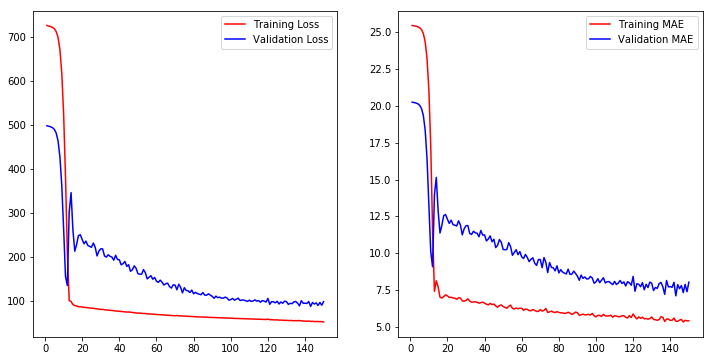

In [294]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'], 'r', label='Training Loss')
ax1.plot(range(1, len(hist.history['loss']) + 1), hist.history['val_loss'], 'b', label='Validation Loss')
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(range(1, len(hist.history['loss']) + 1), hist.history['mean_absolute_error'], 'r', label='Training MAE')
ax2.plot(range(1, len(hist.history['loss']) + 1), hist.history['val_mean_absolute_error'], 'b', label='Validation MAE')
ax2.legend()


### Predict on final model

Note: not shown here, but better practice is to checkpoint the model when validation loss decreases and reload the weights corresponding to best validation performance.

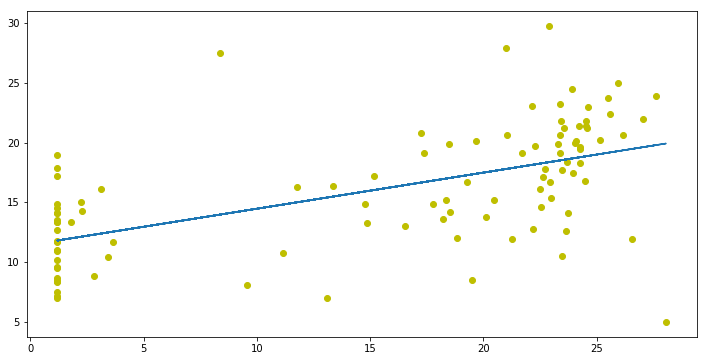

In [295]:
oos_predictions = model.predict(X_test)
plt.scatter(oos_predictions, Y_test, c='y')
plt.plot(oos_predictions[:,0], np.poly1d(np.polyfit(oos_predictions[:,0], Y_test, 1))(oos_predictions[:,0]))

## Classification example

Note no feature scaling in this example

In [296]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [297]:
features, target = load_wine(return_X_y=True)
target = pd.get_dummies(target)
target = target.values
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.30, random_state=53)

In [298]:
val_cutoff = int(X_train.shape[0] * 0.7)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.30, random_state=53)

In [299]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

In [300]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, Y_train, epochs=400, verbose=0, validation_data=(X_val, Y_val))

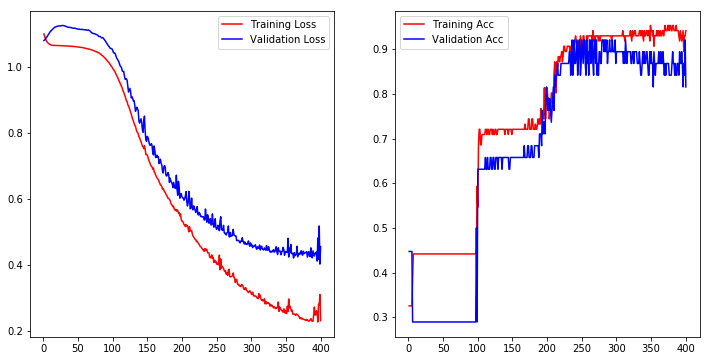

In [301]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'], 'r', label='Training Loss')
ax1.plot(range(1, len(hist.history['loss']) + 1), hist.history['val_loss'], 'b', label='Validation Loss')
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(range(1, len(hist.history['loss']) + 1), hist.history['acc'], 'r', label='Training Acc')
ax2.plot(range(1, len(hist.history['loss']) + 1), hist.history['val_acc'], 'b', label='Validation Acc')
ax2.legend()